In [1]:
import cv2

In [2]:
def cv2_imshow(image):
    cv2.imshow("",image)
    k = cv2.waitKey(0) & 0xFF
    if(k==27):
        cv2.destroyAllWindows()

In [3]:
image = cv2.imread("stop-634941_1280.jpg")

In [4]:
cv2_imshow(image)

In [5]:
import numpy
mask = numpy.zeros(image.shape[:2], numpy.uint8)
image.shape
mask.shape

(854, 1280)

In [6]:
x = 750
y = 130
width = 1100
height = 550



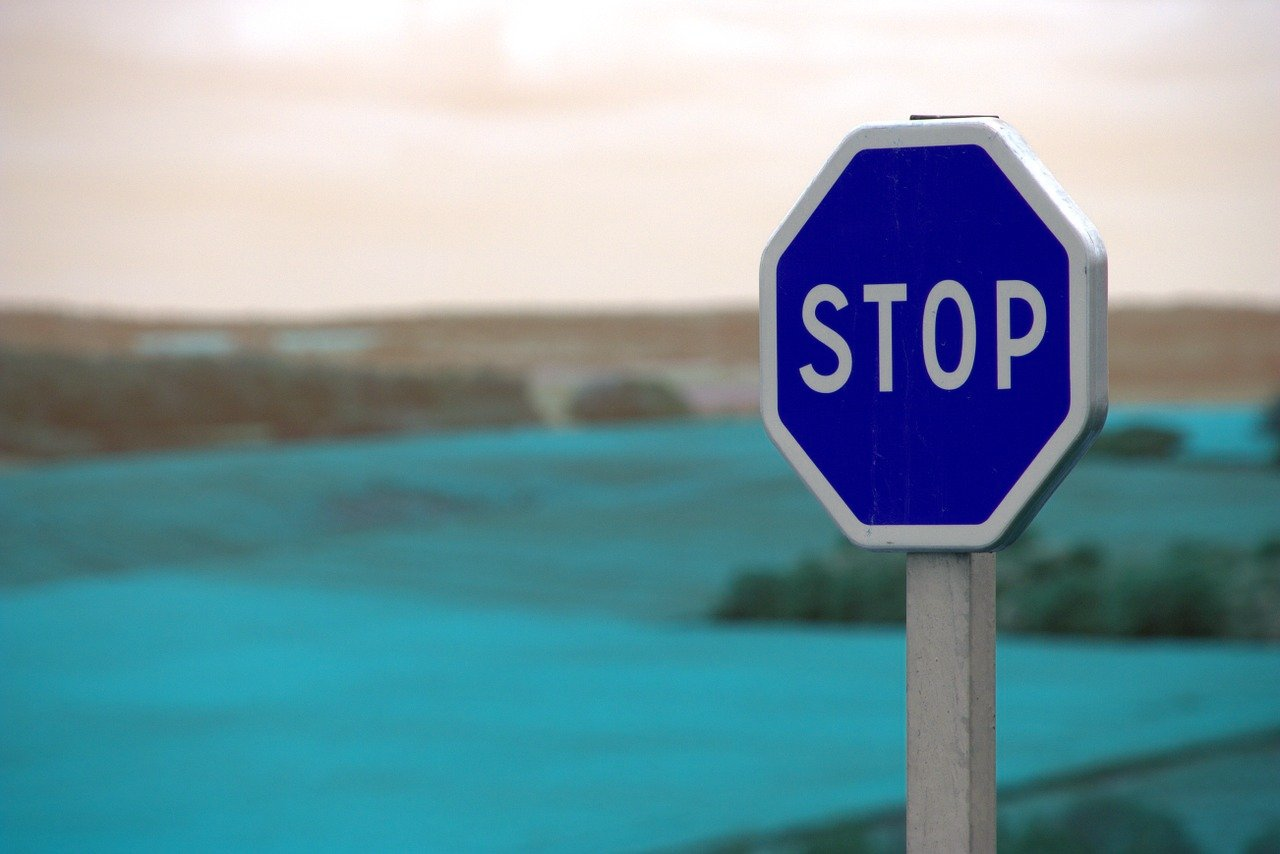

In [7]:
import plotly.express as px
px.imshow(image)

In [8]:
rect = (x,y,width,height)

In [9]:
background_model = numpy.zeros((1,65), numpy.float64)
background_model


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [10]:
foreground_model = numpy.zeros((1,65), numpy.float64)

In [11]:
ITERATIONS = 25
cv2.grabCut(image,
           mask,
           rect = rect,
           bgdModel = background_model,
           fgdModel = foreground_model,
           iterCount = ITERATIONS,
           mode = cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 3.61519738e-01,  1.20220653e-01,  1.69727211e-01,
          2.50814725e-01,  9.77176723e-02,  2.42810791e+02,
          2.31961427e+02,  2.25543200e+02,  6.44770985e+01,
          1.28042874e+02,  1.33876588e+02,  1.31287360e+02,
          1.25128544e+02,  1.14782516e+02,  4.13481022e+01,
          1.52358292e+02,  1.68197024e+02,  4.94900601e+01,
          1.05156076e+02,  1.09511220e+02,  1.18547533e+02,
          1.38612544e+02,  1.56416191e+02,  1.38612544e+02,
          1.77143960e+02,  2.08545860e+02,  1.56416191e+02,
          2.08545860e+02,  2.59407153e+02,  1.86594390e+01,
         -8.16153181e+00, -1.34555636e+01, -8.16153181e+00,
          7.09067111e+01,  9.06682383e+01, -1.34555636e+01,
          9.06682383e+01,  1.20556266e+02,  1.33105467

In [12]:
created_mask = numpy.where((mask ==2) | (mask == 0), 0 , 1).astype("uint8")
created_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
mask_image = image * created_mask[:,:,numpy.newaxis]

In [14]:
cv2_imshow(mask_image)

In [15]:
cv2.imwrite('Stop_Sign_Foreground.jpg', mask_image)

True